In [483]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
import plotly.express as px  

import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

pd.options.display.max_columns=None

In [484]:
os.getcwd()

'C:\\Users\\sivadas.ps\\Downloads'

In [485]:
os.chdir('C:\\Users\sivadas.ps\Downloads')

In [486]:
df=pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [487]:
print('Total cells :',df.size)
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Total cells : 14340
Rows : 956
Columns : 15


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [489]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


-----------------
# SECTION A: 20 MARKS
--------------

### 1. Answer the following questions using `Rating` and `Founded` columns (5 Marks)

* Remove unwanted columns

Step1: Visualize with a suitable graph for both columns(1 Mark)

Step2: Handle the -1 values in both columns (3 Mark)

Step3: Visualize the outliers with a suitable graph for both columns(1 Mark)


In [490]:
# removing unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

Step1

Text(0.5, 1.0, 'Founded vs Rating.')

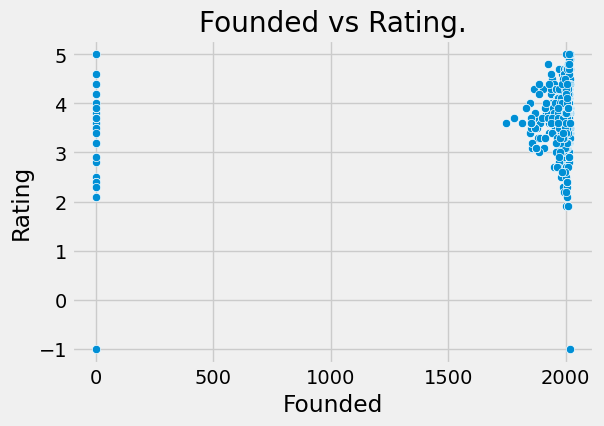

In [491]:
sns.scatterplot(x=df['Founded'],y=df['Rating'])
plt.title("Founded vs Rating.")

Step 2

In [492]:
df['Rating'].mode()

0    3.8
Name: Rating, dtype: float64

In [493]:
df['Rating'].replace(-1,3.8,inplace=True)
# As it is skewed, we need to replace the -1 values with median of rating 

In [494]:
df['Rating'].median()

3.8

In [495]:
df['Founded'].replace(-1,df['Founded'].median(),inplace=True)

Step 3

<Axes: xlabel='Founded'>

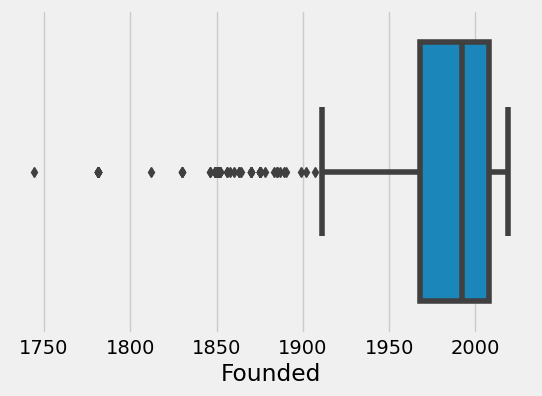

In [496]:
sns.boxplot(x=df['Founded'])

<Axes: xlabel='Rating'>

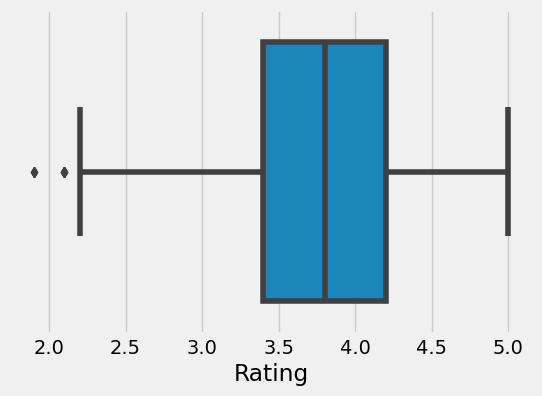

In [497]:
sns.boxplot(x=df['Rating'])

### 2. Answer the following questions

##### A. Create a new column called job_title with the below conditions (7 Marks)

**Step1:** Create a user define function for converting the below job title names into lower case (5 Marks)

    Data Scientist = data scientist

    Data Engineer  = data engineer

    Data Analyst = data analyst

    Machine Learning Engineer = mle

    Manager = manager

    Director = director

    The other titles = other

**Step2:** Display the count plot for job_title (2 Marks)



In [498]:
def convert_lowercase(x):
    a={'Data Scientist' : 'data scientist',
        'Data Engineer'  : 'data engineer',
        'Data Analyst' : 'data analyst',
        'Machine Learning Engineer' : 'mle',
        'Manager' : 'manager',
        'Director' : 'director'}
    return a.get(x,'other')

In [499]:
df['job_title']=df['Job Title'].apply(convert_lowercase)

In [500]:
df['job_title'].value_counts()

job_title
other             686
data scientist    178
data engineer      68
data analyst       18
mle                 6
Name: count, dtype: int64


#### B. Create a new column called job_seniority with the below conditions (6 Marks)


**Step1:** Create a user define function for converting the below job title names into lower case (4 Marks)

    sr = senior or lead or principal

    jr = junior or jr.

    The other titles = other

**Step2:** Display the count plot for job_seniority (2 Marks)


Step  1

In [501]:
df['Job Title'].value_counts()

Job Title
Data Scientist                       178
Data Engineer                         68
Senior Data Scientist                 42
Data Analyst                          18
Senior Data Engineer                  17
                                    ... 
Data Science Intern                    1
Environmental Scientist                1
Environmental Data Specialist          1
Data & Analytics Consultant (NYC)      1
Machine Learning Engineer (NLP)        1
Name: count, Length: 328, dtype: int64

In [502]:
def convert_jt(x):
    if 'sr' in x.lower():
        return 'sr'
    elif 'jr' in x.lower():
        return 'jr'
    elif 'senior' in x.lower() or 'lead' in x.lower() or 'principal' in x.lower():
        return 'sr'
    elif 'junior' in x.lower() :
        return 'jr'
    else:
        return 'other'
            

In [503]:
df['seniority']=df['Job Title'].apply(convert_jt)

In [504]:
df['seniority'].value_counts()

seniority
other    687
sr       266
jr         3
Name: count, dtype: int64

Step 2

<Axes: xlabel='seniority', ylabel='count'>

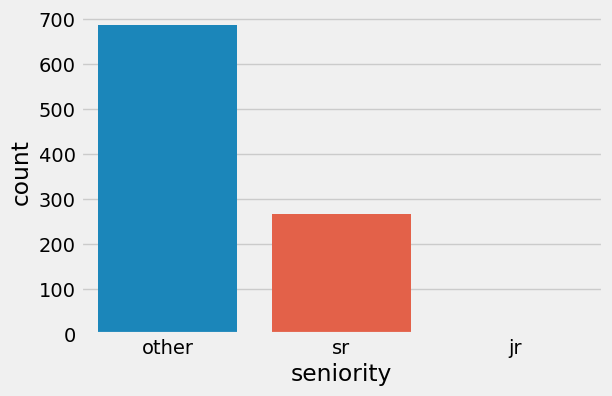

In [505]:
sns.countplot(x=df['seniority'])

#### C. Remove the Job Title column from the dataframe (2 Mark)

In [506]:
df.drop('Job Title',axis=1,inplace=True)

In [507]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other


---------------
# SECTION B: 20 MARKS
------------

### 3. Answer the following questions using `salary` column ()



* Step1:Create a new column called `salary` from `Salary Estimate` with the below (3 marks)



**Condition:** Extract from 53𝐾− 91K (Glassdoor est.) into $53K-$91K



* Step2: Replace -1 value with NaN (2 Mark)



* Step3: Removing '$' and 'K' (2 Mark)



* Step4: Remove the string employer provided salary from the salary array (3 marks)



**Input:**'Employer Provided Salary:120-140'



**Output:** '120-140'



* Step5: Convert per hour salaries to per year salaries (3 marks)



* Step6: Creating again new column called `Salary` from `salary` with example average of the range and also display the histogram.(3 marks)




* Step7: Handle NaN values in the `Salary` column(2 marks)




* Setp8: Check outliers in `Salary` with a suitable graph (2 marks)

Step 1

In [508]:
df['Salary Estimate']=df['Salary Estimate'].replace('-1',np.nan)

In [509]:
df['salary']=df['Salary Estimate'].str.replace('(Glassdoor est.)','')

In [510]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,$53K-$91K
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other,$63K-$112K
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,$80K-$90K
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,$56K-$97K
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,$86K-$143K


Step 2

In [511]:
df['salary']=df['salary'].str.replace('$','')

Step 3

In [512]:
df['salary']=df['salary'].str.replace('K','')

In [513]:
df['salary']

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: salary, Length: 956, dtype: object

Step 4

In [514]:
df['salary'].value_counts()

salary
49-113                  6
86-143                  6
54-115                  6
21-34 Per Hour          6
74-124                  5
                       ..
74-119                  1
55-97                   1
15-16(Employer est.)    1
61-106                  1
62-113                  1
Name: count, Length: 416, dtype: int64

In [515]:
df['salary']=df['salary'].replace('(Employer est.)','')

Step 5

In [516]:
df['salary']=df['salary'].replace('(Employer est.)','')

In [517]:
df['salary'].value_counts()

salary
49-113                  6
86-143                  6
54-115                  6
21-34 Per Hour          6
74-124                  5
                       ..
74-119                  1
55-97                   1
15-16(Employer est.)    1
61-106                  1
62-113                  1
Name: count, Length: 416, dtype: int64

In [518]:
df[df['salary']==('15-16(Employer est.)')]

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary
296,$15K-$16K(Employer est.),Learn and work on meaningful initiatives with ...,3.9,NPD\n3.9,"Port Washington, NY","Port Washington, NY",1001 to 5000 employees,1966,Company - Private,Research & Development,Business Services,$100 to $500 million (USD),-1,data scientist,other,15-16(Employer est.)


In [519]:
df[df['salary']=='21-34 Per Hour']

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary
209,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour
247,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour
337,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour
456,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour
682,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour
919,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,other,other,21-34 Per Hour


In [520]:
df['salary']=df['salary'].str.strip()

In [521]:
df['salary']=df['salary'].replace('(Employer est.)','')

In [522]:
df['salary']=df['salary'].replace(' Per Hour','')

In [523]:
df['salary']=df['salary'].str.replace('(Employer est.)','')

In [524]:
df['salary']=df['salary'].str.replace(' Per Hour','')

In [525]:
df['salary']=df['salary'].str.replace('Employer Provided Salary:','')

In [526]:
df[['sa1','sa2']]=df['salary'].str.split('-',expand=True)

In [527]:
df['sa1']=df['sa1'].str.strip()

In [528]:
df['sa2']=df['sa2'].str.strip()

In [529]:
df['sa1'].skew()

0.9632862889079724

In [530]:
df['sa1'].replace(np.nan,df['sa1'].median(),inplace=True)

In [531]:
df['sa2'].skew()

0.43135426735925947

In [532]:
df['sa2'].replace(np.nan,df['sa2'].median(),inplace=True)

In [533]:
df['sa1']=df['sa1'].astype(int)
df['sa2']=df['sa2'].astype(int)

In [534]:
df['salary']=(df['sa1']+df['sa2'])/2

In [535]:
df['salary'].skew()

0.7695249290710243

In [536]:
df['salary'].median()

96.5

In [537]:
df['salary'].replace(np.nan,96.5,inplace=True)

In [538]:
df['salary']=df['salary'].apply(lambda x: x*40*52)

<Axes: xlabel='salary', ylabel='Count'>

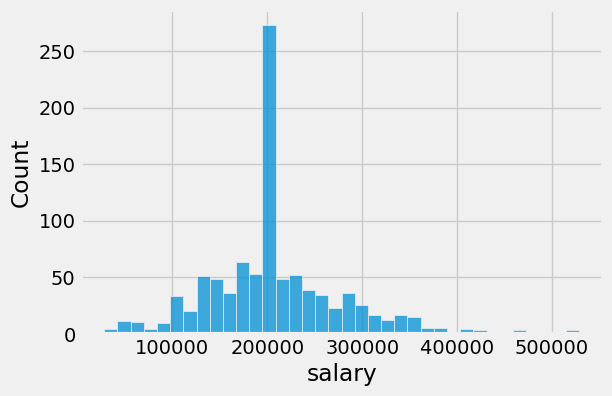

In [539]:
sns.histplot(df['salary'])

<Axes: >

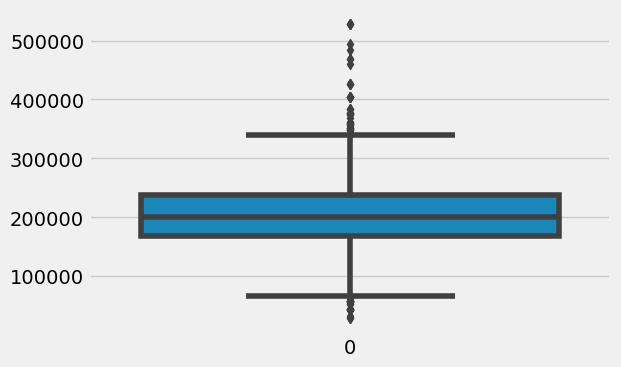

In [540]:
sns.boxplot(df['salary'])

------------
# SECTION C: 30 MARKS

-------------------

#### 4. Display the correlation matrix for Rating, Founded, and Salary columns. Write your observation (6 Marks)



In [541]:
c=df[['Rating','Founded','salary']].corr()

<Axes: >

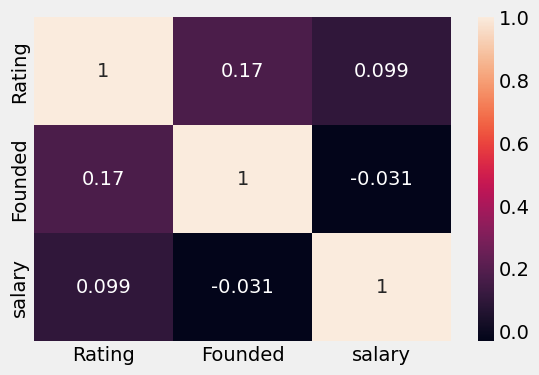

In [542]:
sns.heatmap(c,annot=True)

#### 5. Create columns of 'python_jobs, excel_jobs, sql_jobs, tableau_jobs'  from `Job Description`. Display count plot for all coulmns and drop Job Description column  (7 Marks) 



In [543]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,sa1,sa2
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,149760.0,53,91
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other,182000.0,63,112
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,176800.0,80,90
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,159120.0,56,97
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,238160.0,86,143


In [544]:
df['python_jobs']=df['Job Description'].str.contains('Python',case=False,na=False)   
df['excel_jobs']=df['Job Description'].str.contains('Excel',case=False,na=False)   
df['sql_jobs']=df['Job Description'].str.contains('SQL',case=False,na=False)   
df['tableau_jobs']=df['Job Description'].str.contains('Tableau',case=False,na=False)   

In [545]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,sa1,sa2,python_jobs,excel_jobs,sql_jobs,tableau_jobs
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,149760.0,53,91,True,True,False,True
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other,182000.0,63,112,True,False,False,False
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,176800.0,80,90,True,True,True,False
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,159120.0,56,97,True,False,False,False
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,238160.0,86,143,True,True,True,False


In [546]:
df[['python_jobs','excel_jobs','sql_jobs','tableau_jobs']]=df[['python_jobs','excel_jobs','sql_jobs','tableau_jobs']].astype(int)

In [547]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,sa1,sa2,python_jobs,excel_jobs,sql_jobs,tableau_jobs
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,149760.0,53,91,1,1,0,1
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other,182000.0,63,112,1,0,0,0
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,176800.0,80,90,1,1,1,0
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,159120.0,56,97,1,0,0,0
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,238160.0,86,143,1,1,1,0


<Axes: ylabel='count'>

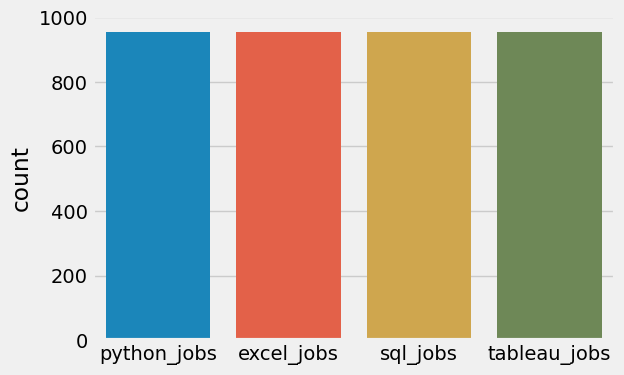

In [548]:
sns.countplot(df[['python_jobs','excel_jobs','sql_jobs','tableau_jobs']])

<Axes: ylabel='count'>

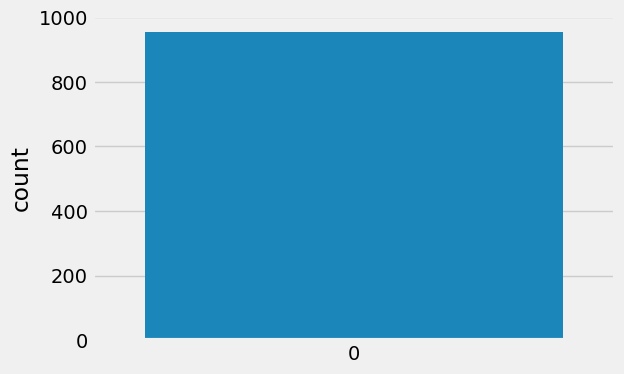

In [549]:
sns.countplot(df['sql_jobs'])

In [550]:
df.drop('Job Description',axis=1,inplace=True)

#### 6. Take the top 9 sectors from `Sector ` column, and replace the remaining by 'Others'. Display the count plot. (7 Marks)

In [551]:
df['Sector'].value_counts().to_dict()

{'Information Technology': 239,
 'Biotech & Pharmaceuticals': 148,
 'Business Services': 134,
 'Insurance': 71,
 'Finance': 56,
 'Health Care': 51,
 'Manufacturing': 40,
 '-1': 39,
 'Aerospace & Defense': 32,
 'Education': 26,
 'Retail': 16,
 'Non-Profit': 16,
 'Oil, Gas, Energy & Utilities': 15,
 'Media': 13,
 'Government': 13,
 'Transportation & Logistics': 8,
 'Real Estate': 8,
 'Travel & Tourism': 8,
 'Telecommunications': 6,
 'Arts, Entertainment & Recreation': 4,
 'Construction, Repair & Maintenance': 4,
 'Consumer Services': 4,
 'Mining & Metals': 3,
 'Agriculture & Forestry': 1,
 'Accounting & Legal': 1}

In [552]:
df['Sector'].value_counts().nlargest(9)

Sector
Information Technology       239
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
-1                            39
Aerospace & Defense           32
Name: count, dtype: int64

In [553]:
df['Sector']=df['Sector'].replace('-1','Information Technology')

In [554]:
df['Sector'].value_counts().nlargest(9)

Sector
Information Technology       278
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: count, dtype: int64

In [555]:
def asd(x):
    s={'Information Technology': 'Information Technology',
 'Biotech & Pharmaceuticals': 'Biotech & Pharmaceuticals',
 'Business Services': 'Business Services',
 'Insurance': 'Insurance',
 'Finance': 'Finance',
 'Health Care': 'Health Care',
 'Manufacturing': 'Manufacturing',
 'Aerospace & Defense': 'Aerospace & Defense',
 'Education': 'Education'}
    return s.get(x,'other')
    

In [556]:
df['Sector']=df['Sector'].apply(asd)

In [557]:
df['Sector'].value_counts()

Sector
Information Technology       278
Biotech & Pharmaceuticals    148
Business Services            134
other                        120
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Aerospace & Defense'),
  Text(1, 0, 'Health Care'),
  Text(2, 0, 'Business Services'),
  Text(3, 0, 'other'),
  Text(4, 0, 'Finance'),
  Text(5, 0, 'Information Technology'),
  Text(6, 0, 'Biotech & Pharmaceuticals'),
  Text(7, 0, 'Insurance'),
  Text(8, 0, 'Manufacturing'),
  Text(9, 0, 'Education')])

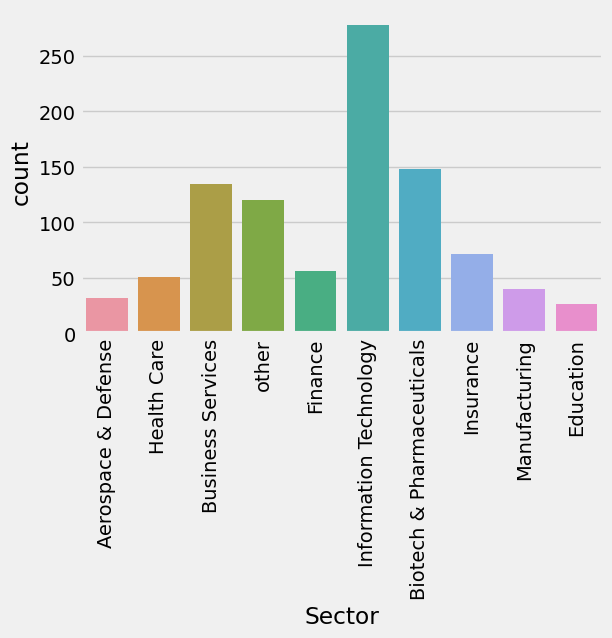

In [558]:
sns.countplot(x=df['Sector'])
plt.xticks(rotation=90)

#### 7. Answer the following questions (10 marks)

##### A. Convert categorical variables to numeric variables in `Size` column (4 marks)

1. 'Unknown': 0, 
2. '1 to 50 employees': 1,
3. '51 to 200 employees': 2, 
4. '201 to 500 employees': 3,
5. '501 to 1000 employees': 4, 
6. '1001 to 5000 employees': 5, 
7. '5001 to 10000 employees': 6, 
8. '10000+ employees': 7

##### B. Convert categorical variables to numeric variables in `Revenue` column (4 marks)

1. 'Unknown / Non-Applicable': 0, 

2. 'Less than $1 million (USD)': 1, 

-----------------

------------------

13. '$10+ billion (USD)':12

##### C. Convert categorical variables to numeric variables in `job_seniority` column (2 marks)

1. 'other': 0, 
2. 'jr':
3. 1, 'sr': 2


A

In [559]:
df['Size'].replace('-1','1001 to 5000 employees',inplace=True)

In [560]:
df['Size'].value_counts().to_dict()

{'1001 to 5000 employees': 188,
 '201 to 500 employees': 160,
 '51 to 200 employees': 155,
 '10000+ employees': 154,
 '501 to 1000 employees': 144,
 '5001 to 10000 employees': 79,
 '1 to 50 employees': 61,
 'Unknown': 15}

In [561]:
df['Size']

0       501 to 1000 employees
1            10000+ employees
2       501 to 1000 employees
3      1001 to 5000 employees
4         51 to 200 employees
                ...          
951    1001 to 5000 employees
952     501 to 1000 employees
953         1 to 50 employees
954      201 to 500 employees
955     501 to 1000 employees
Name: Size, Length: 956, dtype: object

In [562]:
df['Size'].replace({'1001 to 5000 employees': 5,
 '201 to 500 employees': 3,
 '51 to 200 employees': 2,
 '10000+ employees': 7,
 '501 to 1000 employees': 4,
 '5001 to 10000 employees': 6,
 '1 to 50 employees': 1,
 'Unknown': 0},inplace=True)

In [563]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,sa1,sa2,python_jobs,excel_jobs,sql_jobs,tableau_jobs
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,other,149760.0,53,91,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,other,other,182000.0,63,112,1,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,other,176800.0,80,90,1,1,1,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,other,159120.0,56,97,1,0,0,0
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,other,238160.0,86,143,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",other,sr,213200.0,72,133,1,0,1,0
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,other,other,152880.0,56,91,0,1,0,0
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,other,other,265200.0,95,160,0,1,0,0
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom,data engineer,other,200720.0,69,124,1,0,1,0


B

In [564]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [565]:
df['Revenue'].replace('-1','Unknown / Non-Applicable',inplace=True)

In [566]:
df['Revenue'].mode()

0    Unknown / Non-Applicable
Name: Revenue, dtype: object

In [567]:
df['Revenue'].value_counts().to_dict()

{'Unknown / Non-Applicable': 310,
 '$10+ billion (USD)': 140,
 '$100 to $500 million (USD)': 107,
 '$1 to $2 billion (USD)': 68,
 '$500 million to $1 billion (USD)': 62,
 '$25 to $50 million (USD)': 59,
 '$50 to $100 million (USD)': 52,
 '$2 to $5 billion (USD)': 44,
 '$10 to $25 million (USD)': 39,
 '$5 to $10 million (USD)': 29,
 '$5 to $10 billion (USD)': 20,
 '$1 to $5 million (USD)': 17,
 'Less than $1 million (USD)': 9}

In [568]:
df['Revenue'].replace({'Unknown / Non-Applicable':0,
 'Less than $1 million (USD)':1,
 '$1 to $5 million (USD)': 2,
 '$5 to $10 million (USD)': 3,
 '$10 to $25 million (USD)':4 ,
 '$25 to $50 million (USD)': 5,
 '$50 to $100 million (USD)': 6,
 '$100 to $500 million (USD)': 7,
 '$500 million to $1 billion (USD)': 8,
 '$1 to $2 billion (USD)': 9,
 '$2 to $5 billion (USD)': 10,
 '$5 to $10 billion (USD)': 11,
 '$10+ billion (USD)': 12},inplace=True)

C

In [569]:
df['seniority'].replace({'other': 0,
                         'jr': 1,
                         'sr': 2},inplace=True)

In [570]:
df['seniority'].value_counts().to_dict()

{0: 687, 2: 266, 1: 3}

In [571]:
df.drop(['sa1','sa2'],inplace=True,axis=1)

In [572]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0


In [573]:
a=df.groupby(['Founded']).size()

In [574]:
a=a/len(df)

In [575]:
df['founded_size']=df['Founded'].map(a)

In [576]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0,0.020921
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0,0.020921
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0,0.109833
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967


In [577]:
df['Revenue'].replace({'Unknown / Non-Applicable':0,
 'Less than $1 million (USD)':1,
 '$1 to $5 million (USD)': 2,
 '$5 to $10 million (USD)': 3  ,
 '$10 to $25 million (USD)':4 ,
 '$25 to $50 million (USD)': 5,
 '$50 to $100 million (USD)': 6  ,
 '$100 to $500 million (USD)': 7,
 '$500 million to $1 billion (USD)': 8,
 '$1 to $2 billion (USD)': 9,
 '$2 to $5 billion (USD)': 10  ,
 '$5 to $10 billion (USD)': 11,
 '$10+ billion (USD)': 12},inplace=True)

In [578]:
pd.get_dummies(df,columns=['Sector'],drop_first=True,dtype=int)

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Education,Sector_Finance,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_other
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,0,0,0,0,0,0,0,0,0
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,10,-1,other,0,182000.0,1,0,0,0,0.020921,0,0,0,0,1,0,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,0,1,0,0,0,0,0,0,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,0,0,0,0,0,0,0,0,1
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,0,0,0,0,0,1,0,0,0
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,0,-1,other,0,152880.0,0,1,0,0,0.020921,0,0,1,0,0,0,0,0,0
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,3,-1,other,0,265200.0,0,1,0,0,0.109833,0,1,0,0,0,0,0,0,0
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,0,0,0,0,0,1,0,0,0


In [579]:
pd.get_dummies(df,columns=['Sector'],dtype=int)

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,Sector_Aerospace & Defense,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Education,Sector_Finance,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_other
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,1,0,0,0,0,0,0,0,0,0
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,10,-1,other,0,182000.0,1,0,0,0,0.020921,0,0,0,0,0,1,0,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,0,0,1,0,0,0,0,0,0,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,0,0,0,0,0,0,0,0,0,1
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,0,0,0,0,0,0,1,0,0,0
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,0,-1,other,0,152880.0,0,1,0,0,0.020921,0,0,0,1,0,0,0,0,0,0
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,3,-1,other,0,265200.0,0,1,0,0,0.109833,0,0,1,0,0,0,0,0,0,0
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,0,0,0,0,0,0,1,0,0,0


In [580]:
df['Sector'].value_counts().to_dict().keys()

dict_keys(['Information Technology', 'Biotech & Pharmaceuticals', 'Business Services', 'other', 'Insurance', 'Finance', 'Health Care', 'Manufacturing', 'Aerospace & Defense', 'Education'])

In [581]:
le=LabelEncoder()
df['sector_le']=le.fit_transform(df['Sector'])

In [582]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,sector_le
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,0
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0,0.020921,5
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,2
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,9
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,6
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0,0.020921,3
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0,0.109833,2
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,6


In [583]:
oe=OrdinalEncoder(categories=[['Information Technology', 'Biotech & Pharmaceuticals', 'Business Services', 'other', 'Insurance', 'Finance', 'Health Care', 'Manufacturing', 'Aerospace & Defense', 'Education']])
df['sector_oe']=oe.fit_transform(df[['Sector']])

In [584]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,sector_le,sector_oe
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,0,8.0
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0,0.020921,5,6.0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,2,2.0
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,9,3.0
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,6,0.0
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0,0.020921,3,9.0
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0,0.109833,2,2.0
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,6,0.0


In [585]:
sc=StandardScaler()
df['salary_sc']=sc.fit_transform(df[['salary']])

In [586]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,sector_le,sector_oe,salary_sc
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,0,8.0,-0.808782
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0,0.020921,5,6.0,-0.356254
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,2,2.0,-0.429242
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,9,3.0,-0.677403
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,2,2.0,0.432021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,6,0.0,0.081677
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0,0.020921,3,9.0,-0.764989
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0,0.109833,2,2.0,0.811561
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,6,0.0,-0.093495


In [587]:
mc=MinMaxScaler()
df['salary_mc']=mc.fit_transform(df[['salary']])

In [588]:
df

,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,seniority,salary,python_jobs,excel_jobs,sql_jobs,tableau_jobs,founded_size,sector_le,sector_oe,salary_sc,salary_mc
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",4,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,6,-1,data scientist,0,149760.0,1,1,0,1,0.007322,0,8.0,-0.808782,0.243243
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",7,1984,Other Organization,Health Care Services & Hospitals,Health Care,10,-1,other,0,182000.0,1,0,0,0,0.020921,5,6.0,-0.356254,0.307692
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",4,2010,Company - Private,Security Services,Business Services,7,-1,data scientist,0,176800.0,1,1,1,0,0.039749,2,2.0,-0.429242,0.297297
3,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",5,1965,Government,Energy,other,8,"Oak Ridge National Laboratory, National Renewa...",data scientist,0,159120.0,1,0,0,0,0.012552,9,3.0,-0.677403,0.261954
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",2,1998,Company - Private,Advertising & Marketing,Business Services,0,"Commerce Signals, Cardlytics, Yodlee",data scientist,0,238160.0,1,1,1,0,0.005230,2,2.0,0.432021,0.419958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,$72K-$133K (Glassdoor est.),4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",5,2006,Company - Public,Internet,Information Technology,7,"See Tickets, TicketWeb, Vendini",other,2,213200.0,1,0,1,0,0.027197,6,0.0,0.081677,0.370062
952,$56K-$91K (Glassdoor est.),2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",4,1984,College / University,Colleges & Universities,Education,0,-1,other,0,152880.0,0,1,0,0,0.020921,3,9.0,-0.764989,0.249480
953,$95K-$160K (Glassdoor est.),3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1,1992,Company - Private,Staffing & Outsourcing,Business Services,3,-1,other,0,265200.0,0,1,0,0,0.109833,2,2.0,0.811561,0.474012
954,NaN,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",3,2015,Company - Private,IT Services,Information Technology,5,Slalom,data engineer,0,200720.0,1,0,1,0,0.021967,6,0.0,-0.093495,0.345114


<Axes: xlabel='salary', ylabel='Density'>

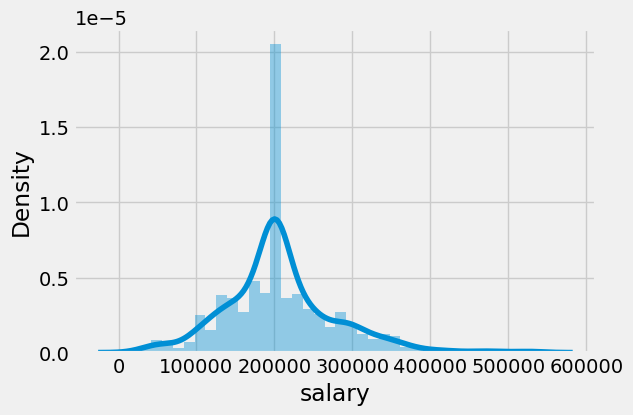

In [589]:
sns.distplot(df['salary'])

<Axes: xlabel='salary_sc', ylabel='Density'>

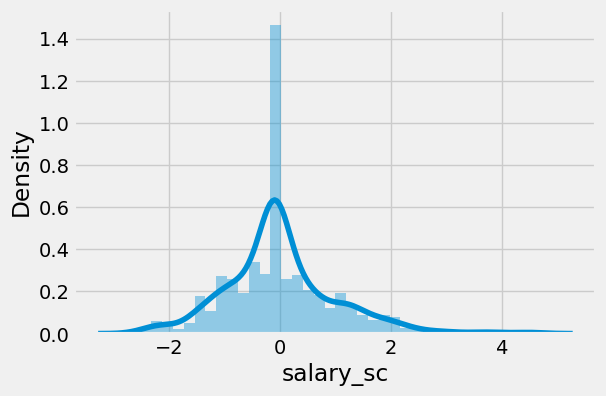

In [590]:
sns.distplot(df['salary_sc'])

<Axes: xlabel='Founded'>

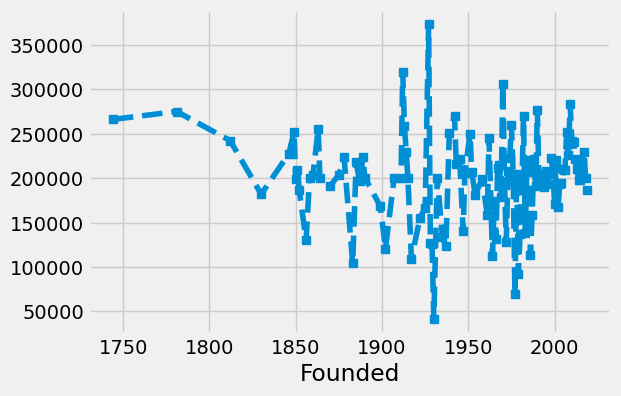

In [591]:
df.groupby(['Founded'])['salary'].mean().plot(kind='line',marker='s',linestyle='--')

<Axes: xlabel='Founded'>

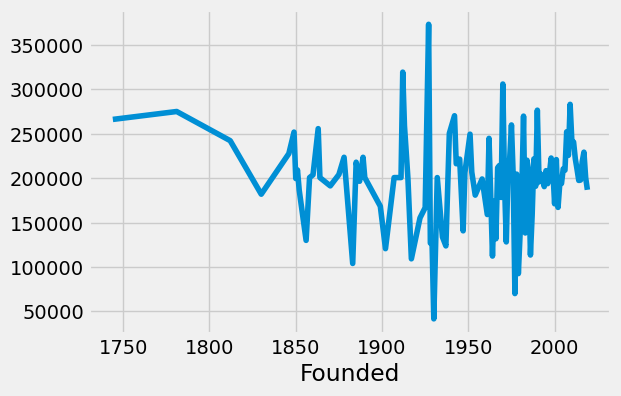

In [598]:
df.groupby(['Founded'])['salary'].mean().plot(kind='line')

In [605]:
df=sns.load_dataset('tips')

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [607]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [611]:
df.groupby(['sex'])[['total_bill','tip']].mean()

,total_bill,tip
sex,,
Male,20.744076,3.089618
Female,18.056897,2.833448


In [ ]:
sns.barplot()

In [612]:
dir(list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']